In [131]:
import pandas as pd

In [133]:
df = pd.read_csv(r'Twitter_Data.csv')

In [135]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [137]:
df.shape

(162980, 2)

In [139]:
df.isna().sum()

clean_text    4
category      7
dtype: int64

In [141]:
df.dropna(inplace=True)

In [13]:
import regex 

In [15]:
def remove_unicode_punc(text):
    if isinstance(text, str):
        return regex.sub(r'\p{P}', '', text)
    return text

In [17]:
df['clean_text'] = df['clean_text'].apply(remove_unicode_punc)

In [19]:
from nltk.corpus import stopwords

In [21]:
stop_words = set(stopwords.words('english'))

In [23]:
def remove_stopwords(text):
    new_text = [word for word in text.split() if word not in stop_words]
    return " ".join(new_text)

In [29]:
df1 = []
df1 = df['clean_text'].apply(remove_stopwords)

In [31]:
df1 = pd.DataFrame(df1)

In [43]:
df1['category'] = df['category']

In [33]:
df['category'] = df['category'].replace({-1: 'negative', 0: 'neutral', 1: 'positive'})

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

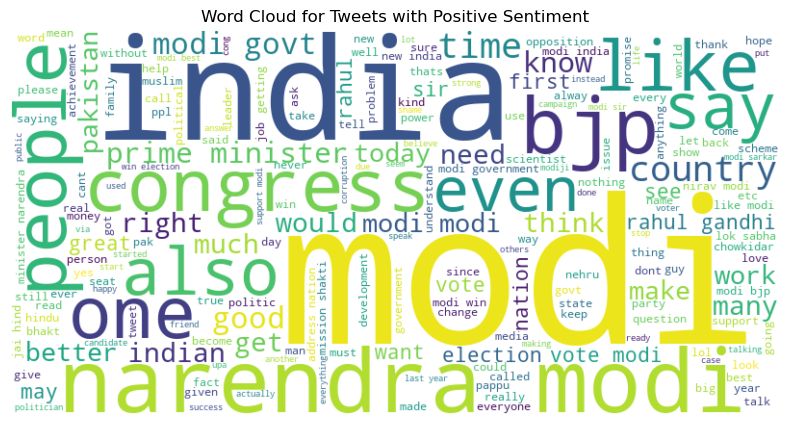

In [47]:
text = ''

for tweet in df1[df1['category'] == 'positive']['clean_text']:
    text += f" {tweet}"
    
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Tweets with Positive Sentiment")

del text

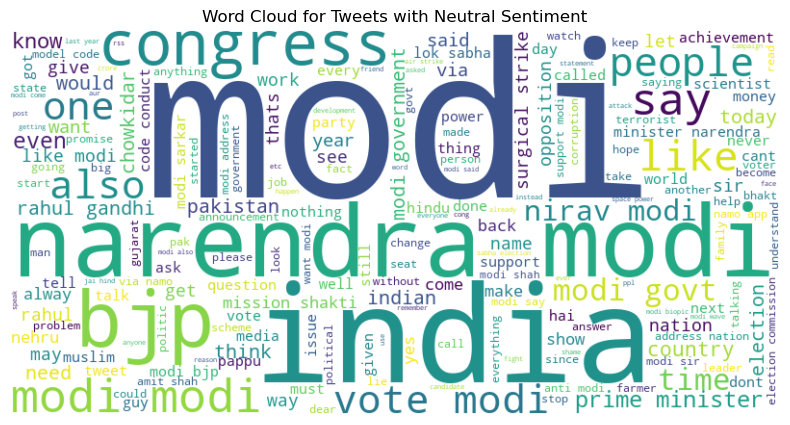

In [32]:
text = ''

for tweet in df1[df1['category'] == 'neutral']['clean_text']:
    text += f" {tweet}"
    
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Tweets with Neutral Sentiment")

del text

Text(0.5, 1.0, 'Word Cloud for Tweets with Negative Sentiment')

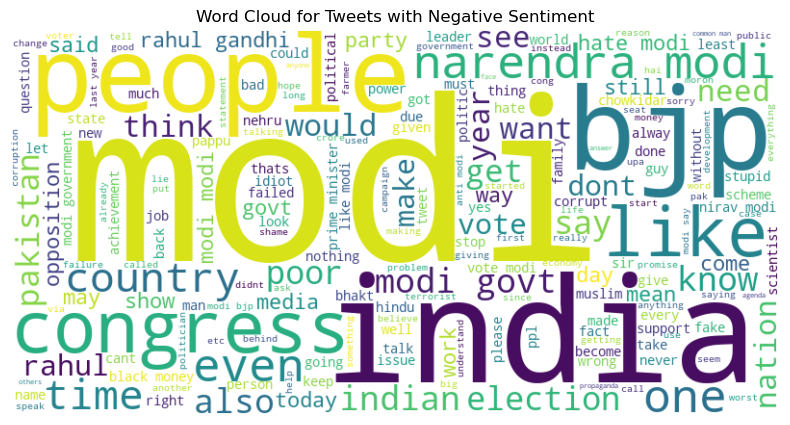

In [33]:
text = ''

for tweet in df1[df1['category'] == 'negative']['clean_text']:
    text += f" {tweet}"
    
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Tweets with Negative Sentiment")

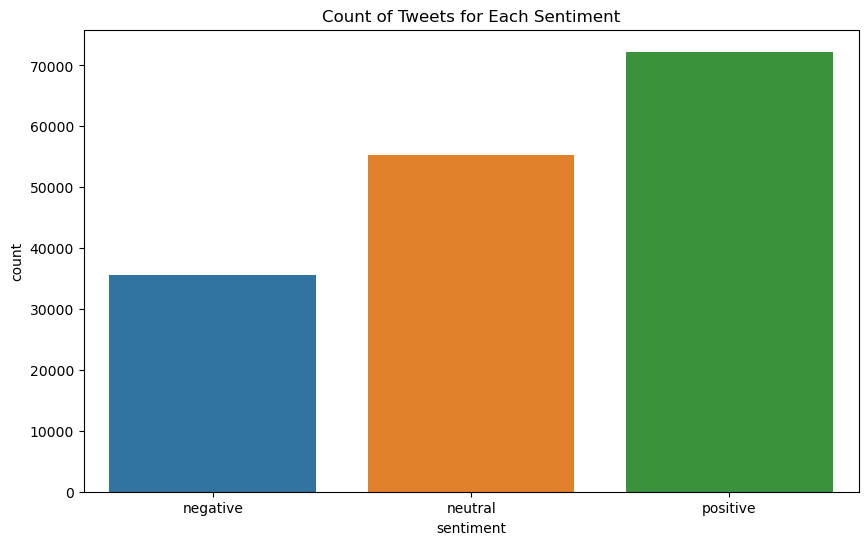

In [37]:
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.countplot(x='sentiment', data=df, hue='sentiment', palette=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Count of Tweets for Each Sentiment")
plt.show()

In [48]:
from textblob import TextBlob

In [49]:
def get_sentiment(text):
    blob = TextBlob(text)
    return pd.Series([blob.sentiment.polarity, blob.sentiment.subjectivity], index=["Polarity", "Subjectivity"])

In [50]:
df[['Polarity', 'Subjectivity']] = df['clean_text'].apply(get_sentiment)

In [51]:
df

,clean_text,category,Polarity,Subjectivity
0,when modi promised minimum government maximum ...,negative,-0.300000,0.700000
1,talk all the nonsense and continue all the dra...,neutral,0.000000,0.000000
2,what did just say vote for modi welcome bjp t...,positive,0.483333,0.616667
3,asking his supporters prefix chowkidar their n...,positive,0.150000,0.658333
4,answer who among these the most powerful world...,positive,0.400000,0.750000
...,...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,negative,-0.291667,0.541667
162976,dear rss terrorist payal gawar what about modi...,negative,-0.195833,0.433333
162977,did you cover her interaction forum where she ...,neutral,0.000000,0.000000
162978,there big project came into india modi dream p...,neutral,0.000000,0.100000


In [52]:
import seaborn as sns

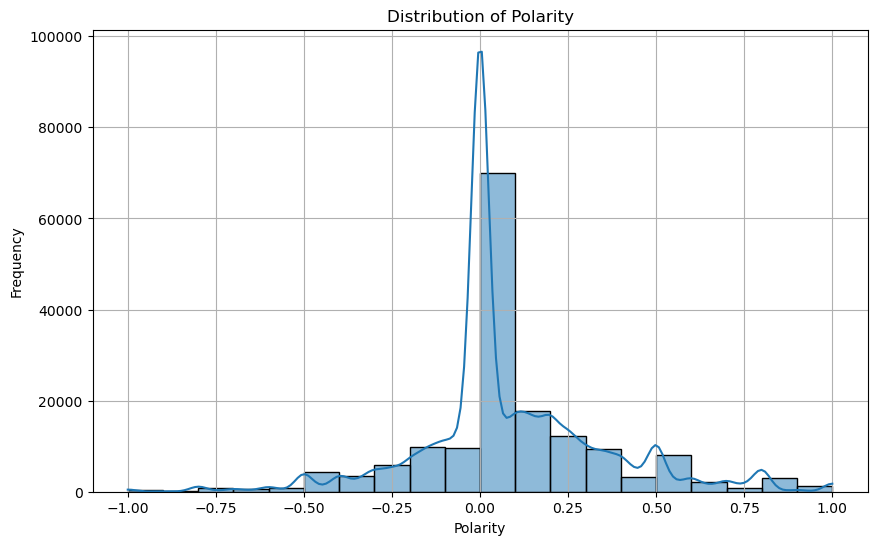

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(x='Polarity', data=df, bins=20, kde=True)
plt.title(f"Distribution of Polarity")
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

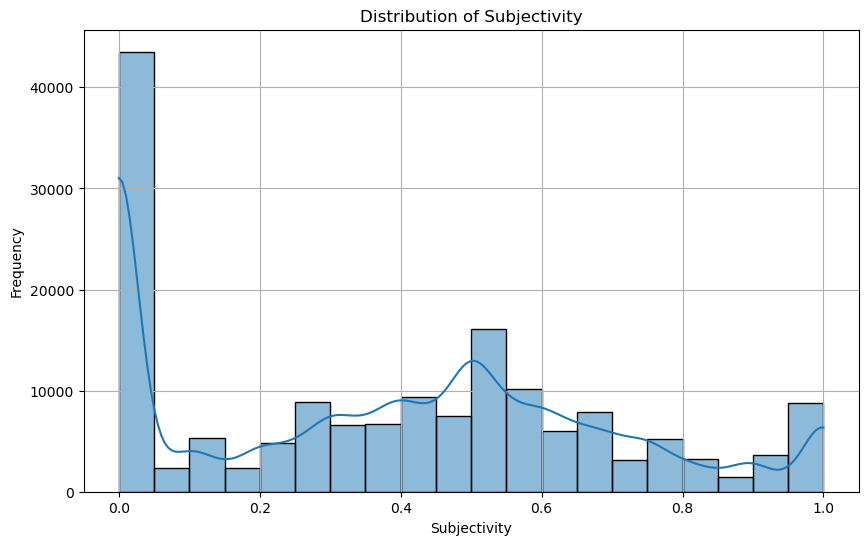

In [54]:
plt.figure(figsize=(10,6))
sns.histplot(x='Subjectivity', data=df, bins=20, kde=True)
plt.title(f"Distribution of Subjectivity")
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [147]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [149]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

In [151]:
labels = df['category'].map({'negative': 0, 'neutral': 1, 'positive': 2})

In [167]:
labels = df['category'].map({-1: 0, 0: 1, 1: 2})

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [171]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

In [173]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [175]:
y_pred = model.predict(X_test)

In [177]:
from sklearn.metrics import accuracy_score, f1_score

In [179]:
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy} & F1 Score: {f1_score}")

Accuracy: 0.8366877339387617 & F1 Score: 0.8329962527922834
